# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [173]:
# Load pickled data
import pickle

## bringing in the train, validation, and test data
# training_file = '/Users/jwen/Python/Projects/sdcnd_traffic_sign/traffic-signs-data/train.p'
# validation_file= '/Users/jwen/Python/Projects/sdcnd_traffic_sign/traffic-signs-data/valid.p'
# testing_file = '/Users/jwen/Python/Projects/sdcnd_traffic_sign/traffic-signs-data/test.p'

training_file = '/home/carnd/sdcnd_traffic_sign/traffic-signs-data/train.p'
validation_file= '/home/carnd/sdcnd_traffic_sign/traffic-signs-data/valid.p'
testing_file = '/home/carnd/sdcnd_traffic_sign/traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [174]:
import numpy as np
import pandas as pd

# Number of training examples
n_train = train['features'].shape[0]

# Number of testing examples.
n_test = test['features'].shape[0]

# What's the shape of an traffic sign image?
image_shape = train['features'].shape[1:3]

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(train['labels']))

print("Number of training examples =", n_train)
print("Number of validation examples =", valid['features'].shape[0])
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [4]:
### Data exploration visualization code goes here.
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline

sign_names = pd.read_csv('/Users/jwen/Python/Projects/sdcnd_traffic_sign/signnames.csv')

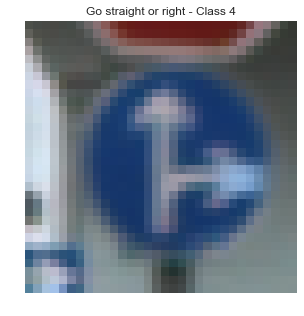

In [608]:
## plotting a sample traffic sign
plt.figure(figsize=(5,5))
plt.grid(False)
plt.title(str(sign_names[sign_names["ClassId"] == y_train[index]].iloc[0,1]) + " - Class " + str(class_num))
plt.tick_params(axis='x', colors=(0,0,0,0))
plt.tick_params(axis='y', colors=(0,0,0,0))
plt.imshow(X_train[1099])

## save the image
# plt.savefig('/Users/jwen/Python/Projects/sdcnd_traffic_sign/media/class0_class4_2.png')

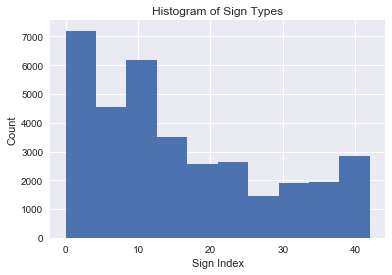

In [609]:
## histogram of the different sign types
plt.hist(train['labels'])
plt.xlabel('Sign Index')
plt.ylabel('Count')
plt.title('Histogram of Sign Types')

# fig = plt.figure(figsize=(10,6))
# ax = fig.add_subplot(111)
# plt.hist(train['labels'])
# plt.xlabel('Sign Index')
# plt.ylabel('Count')
# plt.title('Histogram of Sign Types')
# plt.savefig('/Users/jwen/Python/Projects/sdcnd_traffic_sign/media/histogram.png')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [34]:
## Shuffling the data
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

In [35]:
## preprocessing steps
import cv2
import random
from scipy import ndimage
from tqdm import tqdm
import pandas as pd

# Grayscale because the color dimensions add complexity and might not provide much information
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

# Normalizes the data to have a mean of 0 and unit variance
def normalize(img):
    return (img - np.mean(img))/np.std(img)
#     return (img - 128)/128
#     return img / 255 * 0.8 + 0.1
    
# Iterates through and preprocesses the images
def preprocess(img_set):
    new_img_set = []
    for img in img_set:
        gray_img = grayscale(img)
        normalize_img = normalize(gray_img)
        new_img_set.append(normalize_img)
        
    return np.array(new_img_set)

## create function for rotating images
def rotate_image(img):
    angle_list = [-15, -10, -5, 5, 10, 15]
    return ndimage.interpolation.rotate(img, random.choice(angle_list), mode='nearest')

## zooms into the image (FROM STACKOVERFLOW: 
## http://stackoverflow.com/questions/37119071/scipy-rotate-and-zoom-an-image-without-changing-its-dimensions/37121993#37121993)
def clipped_zoom(img, **kwargs):

    zoom_factor = random.choice([1.1, 1.2])
    
    h, w = img.shape[:2]

    # width and height of the zoomed image
    zh = int(np.round(zoom_factor * h))
    zw = int(np.round(zoom_factor * w))

    # for multichannel images we don't want to apply the zoom factor to the RGB
    # dimension, so instead we create a tuple of zoom factors, one per array
    # dimension, with 1's for any trailing dimensions after the width and height.
    zoom_tuple = (zoom_factor,) * 2 + (1,) * (img.ndim - 2)

    # zooming out
    if zoom_factor < 1:
        # bounding box of the clip region within the output array
        top = (h - zh) // 2
        left = (w - zw) // 2
        # zero-padding
        out = np.zeros_like(img)
        out[top:top+zh, left:left+zw] = ndimage.interpolation.zoom(img, zoom_tuple, **kwargs)

    # zooming in
    elif zoom_factor > 1:
        # bounding box of the clip region within the input array
        top = (zh - h) // 2
        left = (zw - w) // 2
        out = ndimage.interpolation.zoom(img[top:top+zh, left:left+zw], zoom_tuple, **kwargs)
        # `out` might still be slightly larger than `img` due to rounding, so
        # trim off any extra pixels at the edges
        trim_top = ((out.shape[0] - h) // 2)
        trim_left = ((out.shape[1] - w) // 2)
        out = out[trim_top:trim_top+h, trim_left:trim_left+w]

    # if zoom_factor == 1, just return the input array
    else:
        out = img
    return out

def generate_more_images(img_set, actual_labels):
    
    ## checking that the inputs are the correct lengths
    assert img_set.shape[0] == len(actual_labels)
    
    new_img_set = []
    new_y = []
    
    ## count the number of occurrences in each class and find the avg class size
    class_counts = np.bincount(actual_labels)
    avg_class_size = np.round(np.mean(class_counts))
    
    ## iterate through each class to see how many images need to be added
    for class_num in tqdm(range(len(class_counts))):
        
        img_idx = np.where(actual_labels == class_num)
        
        if class_counts[class_num] < avg_class_size:
            num_to_add = np.int(avg_class_size - class_counts[class_num])
            
            ## randomly assign a transformation (0.85 because zoom operation takes forever)
            for _ in tqdm(range(num_to_add)):
                if random.random() < 0.85:
                    new_img_set.append(rotate_image(img_set[random.choice(img_idx)])[0:32,0:32,:])
                    new_y.append(class_num)
                else:
                    new_img_set.append(clipped_zoom(img_set[random.choice(img_idx)])[0:32,0:32,:])
                    new_y.append(class_num)
    
    return np.array(new_img_set), np.array(new_y)
                    

In [686]:
## generate more images
#new_x, new_y = generate_more_images(X_train, y_train)

## save the generated images
additional_data_file = '/Users/jwen/Python/Projects/sdcnd_traffic_sign/traffic-signs-data/additional_data.p'

with open(additional_data_file, 'wb') as handle:
    pickle.dump({"features":new_x, "labels":new_y}, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [684]:
## fix the shape of the new image array
# new_x = np.array([i[0] for i in new_x])

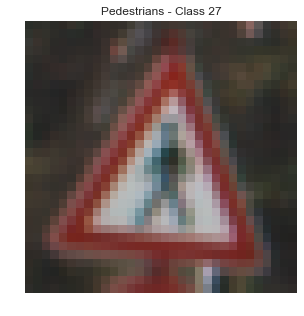

In [715]:
## print newly generated image to test and show
index = 5432
plt.figure(figsize=(5,5))
plt.grid(False)
plt.title(str(sign_names[sign_names["ClassId"] == new_y[index]].iloc[0,1]) + " - Class " + str(new_y[index]))
plt.tick_params(axis='x', colors=(0,0,0,0))
plt.tick_params(axis='y', colors=(0,0,0,0))
plt.imshow(new_x[index])

In [724]:
## combine the generated images and the original training set
X_train = np.append(X_train, new_x, axis=0)
y_train = np.append(y_train, new_y, axis=0)

## preprocess data
X_train = preprocess(X_train)[:,:,:,np.newaxis]
# X_valid = preprocess(X_valid)[:,:,:,np.newaxis]

## save the preprocessed training images
train_data_all_file = '/Users/jwen/Python/Projects/sdcnd_traffic_sign/traffic-signs-data/train_data_all.p'

with open(train_data_all_file, 'wb') as handle:
    pickle.dump({"features":X_train, "labels":y_train}, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [730]:
## added 11915 images
print(new_x.shape)
print(X_train.shape)
print("Added {} images".format(new_x.shape[0]))

(11915, 32, 32, 3)
(46714, 32, 32, 1)
Added 11915 images


In [32]:
# Reloading the pickled training data onto server
import pickle

## bringing in the train, validation, and test data
training_file = '/home/carnd/sdcnd_traffic_sign/traffic-signs-data/train_data_all.p'
validation_file= '/home/carnd/sdcnd_traffic_sign/traffic-signs-data/valid.p'
testing_file = '/home/carnd/sdcnd_traffic_sign/traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

## need to preprocess this
X_valid = preprocess(X_valid)[:,:,:,np.newaxis]
X_test = preprocess(X_test)[:,:,:,np.newaxis]

In [36]:
X_train.shape

(46714, 32, 32, 1)

### Model Architecture

In [37]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

### Define your architecture
def conv2d(x, weights, biases, strides=1, padding='VALID'):
    conv = tf.nn.conv2d(x, weights, strides=[1, strides, strides, 1], padding=padding)
    conv = tf.add(conv, biases)
    return conv

def maxpool2d(x, k=2, padding='VALID'):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding=padding)

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    weights = {
        'c1': tf.Variable(tf.truncated_normal([5, 5, 1, 6], mean=mu, stddev=sigma), name='c1_w'),
        'c2': tf.Variable(tf.truncated_normal([5, 5, 6, 16], mean=mu, stddev=sigma), name='c2_w'),
        'fc1': tf.Variable(tf.truncated_normal([400, 120], mean=mu, stddev=sigma), name='fc1_w'),
        'fc2': tf.Variable(tf.truncated_normal([120, 84], mean=mu, stddev=sigma), name='fc2_w'),
        'fc3': tf.Variable(tf.truncated_normal([84, 43], mean=mu, stddev=sigma), name='fc3_w'),
    }
    
    biases = {
        'c1': tf.Variable(tf.zeros(6), name='c1_b'),
        'c2': tf.Variable(tf.zeros(16), name='c2_b'),
        'fc1': tf.Variable(tf.zeros(120), name='fc1_b'),
        'fc2': tf.Variable(tf.zeros(84), name='fc2_b'),
        'fc3': tf.Variable(tf.zeros(43), name='fc3_b'),
    }
    
    # Layer 1
    conv1 = conv2d(x, weights['c1'], biases['c1'], strides = 1) # Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1 = tf.nn.relu(conv1) # Activation.
    conv1 = maxpool2d(conv1) # Pooling. Input = 28x28x6. Output = 14x14x6.

    # Layer 2
    conv2 = conv2d(conv1, weights['c2'], biases['c2'], strides = 1) # Convolutional. Output = 10x10x16.
    conv2 = tf.nn.relu(conv2) # Activation.
    conv2 = maxpool2d(conv2) # Pooling. Input = 10x10x16. Output = 5x5x16.

    # Flatten
    flatten_layer = flatten(conv2) # Flatten. Input = 5x5x16. Output = 400.
    
    # Layer 3
    fc1 = tf.add(tf.matmul(flatten_layer, weights['fc1']), biases['fc1']) # Fully Connected. Input = 400. Output = 120.
    fc1 = tf.nn.relu(fc1) # Activation.
    fc1 = tf.nn.dropout(fc1, keep_prob) ## Dropout

    # Layer 4
    fc2 = tf.add(tf.matmul(fc1, weights['fc2']), biases['fc2']) # Fully Connected. Input = 120. Output = 84.
    fc2 = tf.nn.relu(fc2) # Activation.
    fc2 = tf.nn.dropout(fc2, keep_prob) ## Dropout

    # Layer 5
    fc3 = tf.add(tf.matmul(fc2, weights['fc3']), biases['fc3']) # Fully Connected. Input = 84. Output = 43.
    
    logits = fc3
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [38]:
## Placeholders for the x and y variables
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

## Parameters
RATE = 0.001
EPOCHS = 25
BATCH_SIZE = 128

## Model pipeline
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = RATE)
training_operation = optimizer.minimize(loss_operation)

### Setting up model evaluation

In [39]:
## Calculate model accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Running model training

In [40]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    
    ## store tore the performance for plots
    training_acc_hist = []
    validation_acc_hist = []
    
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.6})
        
        ## compute the accuracy for the training/ validation sets
        training_accuracy = sess.run(accuracy_operation, feed_dict={x: X_train, y: y_train, keep_prob: 1.0})
        validation_accuracy = sess.run(accuracy_operation, feed_dict={x: X_valid, y: y_valid, keep_prob: 1.0})
        
        ## store history for plotting curves
        training_acc_hist.append(training_accuracy)
        validation_acc_hist.append(validation_accuracy)
        
        validation_predictions = tf.argmax(logits, 1)
        validation_logits = logits
        
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet_traffic_aws')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.858
Validation Accuracy = 0.801

EPOCH 2 ...
Training Accuracy = 0.939
Validation Accuracy = 0.868

EPOCH 3 ...
Training Accuracy = 0.965
Validation Accuracy = 0.886

EPOCH 4 ...
Training Accuracy = 0.975
Validation Accuracy = 0.902

EPOCH 5 ...
Training Accuracy = 0.980
Validation Accuracy = 0.917

EPOCH 6 ...
Training Accuracy = 0.984
Validation Accuracy = 0.925

EPOCH 7 ...
Training Accuracy = 0.985
Validation Accuracy = 0.925

EPOCH 8 ...
Training Accuracy = 0.990
Validation Accuracy = 0.934

EPOCH 9 ...
Training Accuracy = 0.990
Validation Accuracy = 0.934

EPOCH 10 ...
Training Accuracy = 0.992
Validation Accuracy = 0.941

EPOCH 11 ...
Training Accuracy = 0.994
Validation Accuracy = 0.941

EPOCH 12 ...
Training Accuracy = 0.994
Validation Accuracy = 0.948

EPOCH 13 ...
Training Accuracy = 0.993
Validation Accuracy = 0.940

EPOCH 14 ...
Training Accuracy = 0.996
Validation Accuracy = 0.942

EPOCH 15 ...
Training Accuracy = 0.996
Valid

### Validation Set Performance Metrics

Taking a look at the performance of the model on the validation set

In [41]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    validation_accuracy = sess.run(accuracy_operation, feed_dict={x: X_valid, y: y_valid, keep_prob: 1.0})
    print("Validation Accuracy = {:.3f}".format(validation_accuracy))
    validation_pred_label = sess.run([tf.argmax(logits, 1)], feed_dict={x: X_valid, y: y_valid, keep_prob: 1.0})


Validation Accuracy = 0.950


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


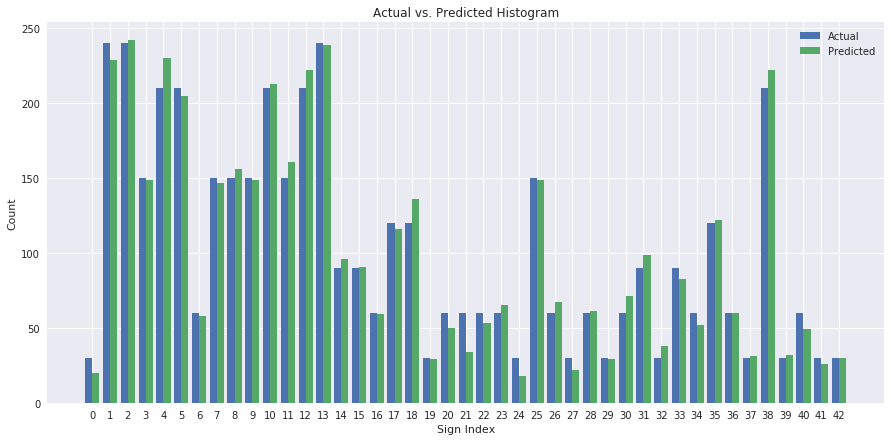

In [42]:
plt.figure(figsize=(15,7))
bins = np.arange(44) - 0.5
plt.hist([y_valid, validation_pred_label[0]], label = ['Actual','Predicted'], bins=bins)
plt.legend()
plt.xticks(range(43))
plt.title("Actual vs. Predicted Histogram")
plt.xlabel('Sign Index')
plt.ylabel('Count')

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


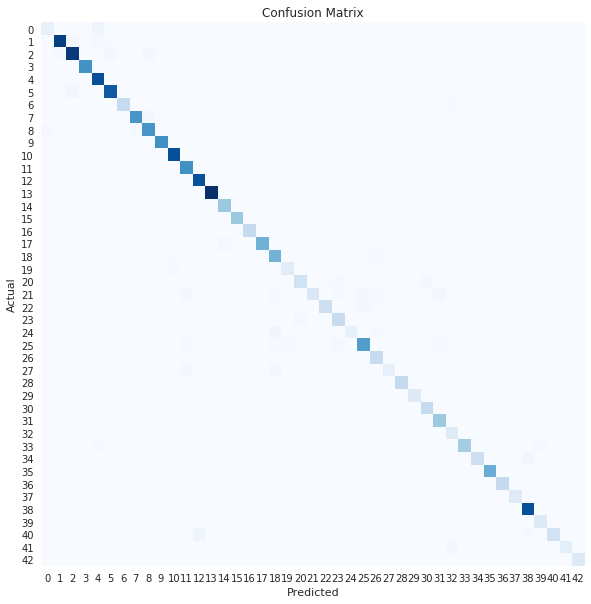

In [43]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(10,10))
plt.xticks(range(43))
plt.yticks(range(43))
plt.grid(False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.imshow(confusion_matrix(y_valid, validation_pred_label[0]), cmap=plt.cm.Blues)

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


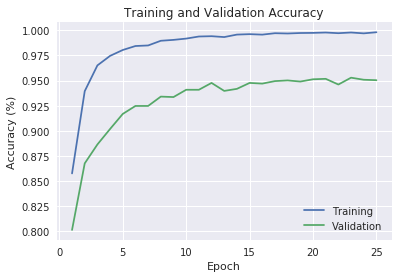

In [44]:
plt.plot(range(1, EPOCHS+1), training_acc_hist, label = "Training")
plt.plot(range(1, EPOCHS+1), validation_acc_hist, label = 'Validation')
plt.title("Training and Validation Accuracy")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")

### Test set accuracy

In [45]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.935


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [46]:
from mpl_toolkits.axes_grid1 import ImageGrid

## read in the new images
def read_new_images(files_path):
    images = []
    
    for file_path in files_path:
        img = cv2.cvtColor(cv2.imread(file_path),cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (image_shape[0], image_shape[1]))
        images.append(img)
        
    return np.array(images)

def plot_img_grid(img_array):

    fig = plt.figure(figsize = (10,15))
    
    grid = ImageGrid(fig, 111, nrows_ncols=(2, 3), axes_pad=0.3,)

    for i in range(len(img_array)):
        grid[i].grid(False)
        grid[i].set_title(str(sign_names[sign_names["ClassId"] == new_labels[i]].iloc[0,1]) + " - Class " + str(new_labels[i]))
        grid[i].imshow(img_array[i])

    plt.show()
        

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


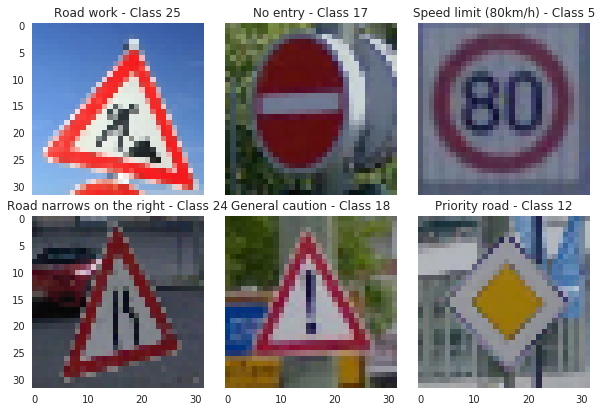

In [47]:
## Load and plot the new test images
sign_names = pd.read_csv('/home/carnd/sdcnd_traffic_sign/signnames.csv') ## on server
new_images_path = ['./media/new_image_1.png','./media/new_image_2.png','./media/new_image_3.png','./media/new_image_4.png',
         './media/new_image_5.png','./media/new_image_6.png']
new_labels = [25, 17, 5, 24, 18, 12]

new_images = read_new_images(new_images_path)
plot_img_grid(new_images)

### Predict the Sign Type for Each Image

In [48]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
new_images_processed = preprocess(new_images)[:,:,:,np.newaxis]

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    new_img_accuracy = evaluate(new_images_processed, new_labels)
    print("New Image Accuracy = {:.3f}".format(new_img_accuracy))

New Image Accuracy = 0.833


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [49]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    logits = sess.run([tf.nn.softmax(logits)], feed_dict={x: new_images_processed, y: new_labels, keep_prob: 1.0})
    print("Test Accuracy = {:.3f}".format(new_img_accuracy))

Test Accuracy = 0.833


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


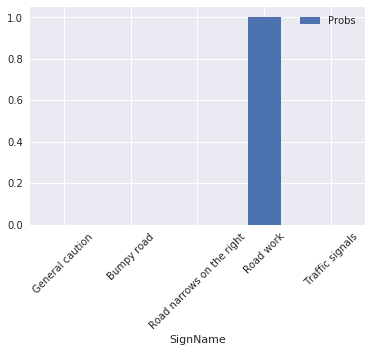

In [102]:
# plt.bar(range(len(logits[0][0].argsort()[-5:][::-1])),logits[0][0][logits[0][0].argsort()[-5:][::-1]])
# plt.xlabels()
#sign_names[sign_names['ClassId'].isin(logits[0][0].argsort()[-5:][::-1])]
ClassId = logits[0][0].argsort()[-5:][::-1]
probs = logits[0][0][logits[0][0].argsort()[-5:][::-1]]
top5_df = pd.DataFrame({"ClassId":ClassId, "Probs":probs})

filtered_signs = sign_names[sign_names['ClassId'].isin(logits[0][0].argsort()[-5:][::-1])]

merged_df = pd.merge(filtered_signs, top5_df)

merged_df.plot(x="SignName", y="Probs", kind="bar")

In [171]:
def plot_softmax_probs(logits_array, img_list, img_labels):
        
    for i, img in enumerate(logits_array[0]):
        plt.subplot(121)
        plt.grid(False)
        plt.title(str(sign_names[sign_names["ClassId"] == img_labels[i]].iloc[0,1]) + " - Class " + str(img_labels[i]))
        plt.tick_params(axis='x', colors=(0,0,0,0))
        plt.tick_params(axis='y', colors=(0,0,0,0))
        plt.imshow(img_list[i])
        
        plt.subplot(122)
        ClassId = img.argsort()[-5:][::-1]
        probs = img[img.argsort()[-5:][::-1]]
        top5_df = pd.DataFrame({"ClassId":ClassId, "Probs":probs})

        filtered_signs = sign_names[sign_names['ClassId'].isin(img.argsort()[-5:][::-1])]

        merged_df = pd.merge(filtered_signs, top5_df)

        plt.bar(range(len(merged_df['Probs'])), merged_df["Probs"])
        plt.xticks(range(len(merged_df['SignName'])), list(merged_df['SignName']), rotation = 90)
        plt.show()
        

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


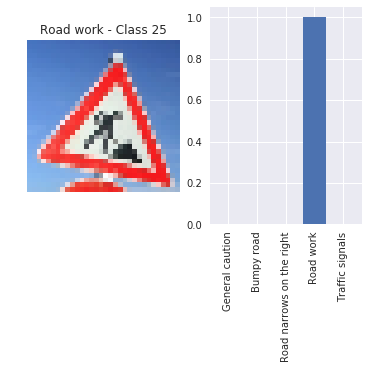

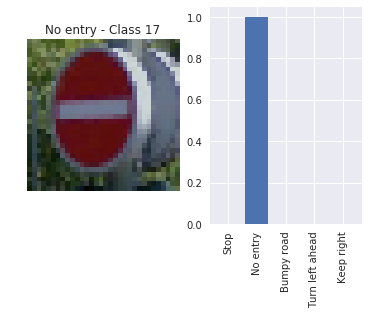

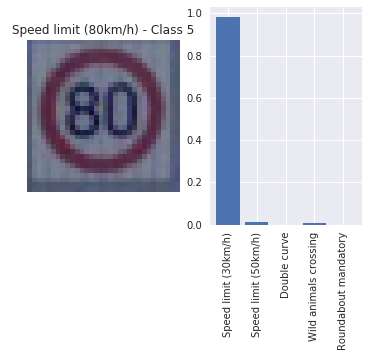

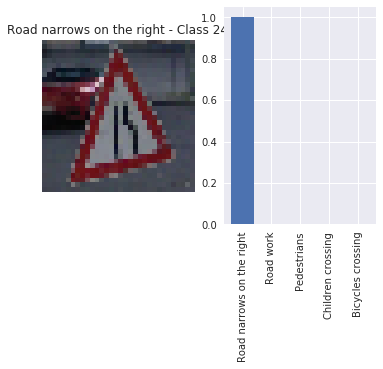

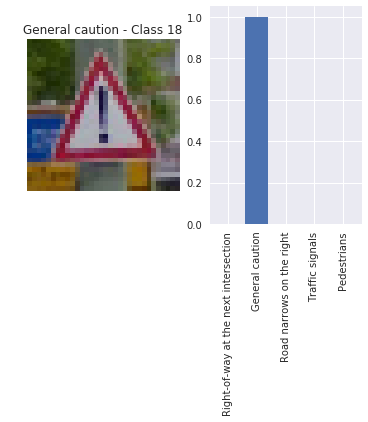

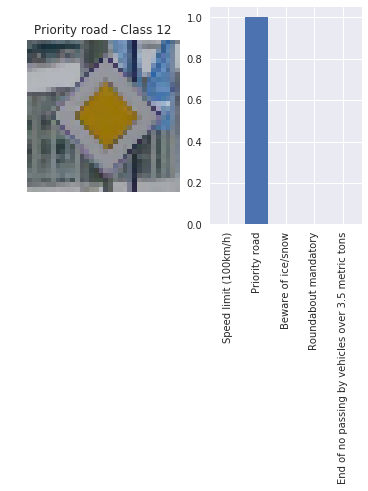

In [172]:
plot_softmax_probs(logits, new_images, new_labels)

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 